In [62]:
from pyforest import * 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

df = pd.read_csv("C:/Users/SAAD KHAN/Desktop/DataSets/HR-Analytics-Python-master/HR_comma_sep.csv") 

In [63]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2: Cleaning the data 

the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values.

In [64]:
#cheack the null values 
df.isnull().sum() / 100
#there is no null values in data 

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

In [65]:
df.shape

(14999, 10)

In [66]:
#Rename the column name because of  better readability
df = df.rename(columns={
    'satisfaction_level':'Satisfaction',
    'last_evaluation':'Evaluation',
    'number_project' : 'ProjectCount',
    'average_montly_hours':'AvgMonthlyHours',
    'time_spend_company':'YearsAtCompany',
    'promotion_last_5years':'Promotion',
    'sales':'Department',
    'salary':'Salary',
    'left':'Turnover'
})

In [67]:
df.head()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Turnover,Promotion,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [68]:
#summary statistics 
df.describe() 

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Turnover,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Step 3: Explore the data 

### 3a. Statistical Overview

the dataset has about 15,000 employee observation and 10 features the company turnover rate of about 23.8% mean satisfaction of employees is 0.612

In [69]:
# Shape of the data
df.shape

# The dataset contains 14999 observations and 10 columns

(14999, 10)

In [70]:
#check the datatype of the columns 
df.dtypes

Satisfaction       float64
Evaluation         float64
ProjectCount         int64
AvgMonthlyHours      int64
YearsAtCompany       int64
Work_accident        int64
Turnover             int64
Promotion            int64
Department          object
Salary              object
dtype: object

In [71]:
#Turnover Rate
turnover_rate = df.Turnover.value_counts(normalize=True)
turnover_rate

#looks like 76% of the employees stayed 23% of the employees left the company 

0    0.761917
1    0.238083
Name: Turnover, dtype: float64

In [72]:
turnover_summary = df.groupby("Turnover") 
turnover_summary.mean()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Promotion
Turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## 3b. Correlation Matrix and heatmap

In [73]:
corr = df.corr()
corr

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Turnover,Promotion
Satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
ProjectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
AvgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
YearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
Promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1, 'Heatmap of the correlation matrix')

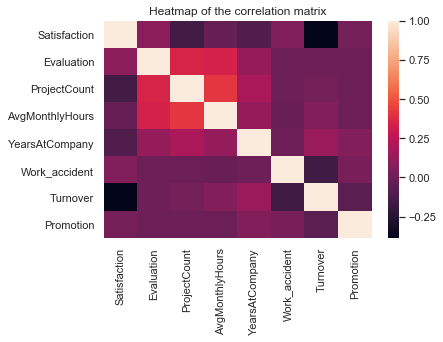

In [74]:
sns.heatmap(corr)   
plt.title("Heatmap of the correlation matrix") 

#### Moderately positive correlated features
ProjectCount and Evaluation : 0.349333

AvgMonthlyHours and Evaluation : 0.339742  

ProjectCount and AvgMonthlyHours: 0.417211	

#### Moderately negative correlated features
Satisfaction and Turnover : -0.388375

#### Summary
From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

In [75]:
##3b.1.Statistical test for Correlation

#### One Sample T-Test

Hypothesis Testing: Check if there is a significant difference in the mean of satisfaction level between employees who had a turnover and the entire employee population.


Null Hypothesis H0: There is no difference in satisfaction level between employees who did turnover and the entire employee population.


Alternate Hypothesis H1: There is a difference in satisfaction level between employees who did turnover and the entire employee population.

In [76]:
# let us compare the mean of employee turnover statisfaction and the mean of employee population satisfaction 
emp_population_satisfaction = df["Satisfaction"].mean()
emp_turnover_satisfaction = df[df["Turnover"]==1]["Satisfaction"].mean() 

print('The mean for the employee(entire) population is   :'  +  str(emp_population_satisfaction))
print('The mean for the employees that had a turnover is : ' +  str(emp_turnover_satisfaction)) 

The mean for the employee(entire) population is   :0.6128335222348166
The mean for the employees that had a turnover is : 0.44009801176140917


In [77]:
#Conduct T-Test 

import scipy.stats as stats
from scipy.stats import ttest_ind

a = df[df.Turnover ==1]["Satisfaction"]
#b = df[df.Turnover ==0]["Satisfaction"]

#ttest_ind(a,b)
stats.ttest_1samp(a , popmean = emp_population_satisfaction)

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

In [78]:
degree_freedom = len(df[df['Turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


T-Test Result

From the above T-Test, we see that the test statistic lies in the rejection region and hence we conclude that the sample data provides enough evidence to support Alternative Hypothesis.

Also, the p-value is very low and is less than 0.05, hence we can reject the Null Hypothesis.

## 3c. Distribution Plots 

In [79]:
df.columns

Index(['Satisfaction', 'Evaluation', 'ProjectCount', 'AvgMonthlyHours',
       'YearsAtCompany', 'Work_accident', 'Turnover', 'Promotion',
       'Department', 'Salary'],
      dtype='object')

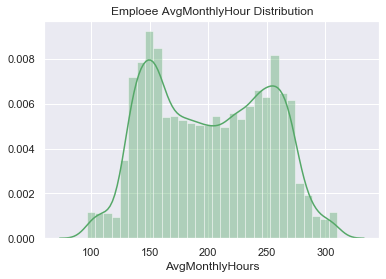

In [80]:
sns.distplot(df.AvgMonthlyHours, color="g").set_title('Emploee AvgMonthlyHour Distribution') 
sns.set(rc={'figure.figsize':(11.7,8.27)})

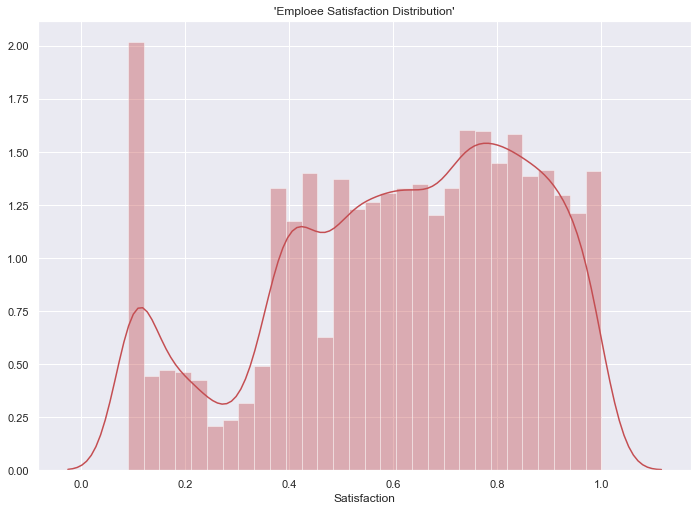

In [81]:
sns.distplot(df.Satisfaction, color="r").set_title("'Emploee Satisfaction Distribution'") 
sns.set(rc={'figure.figsize':(11.7,8.27)})

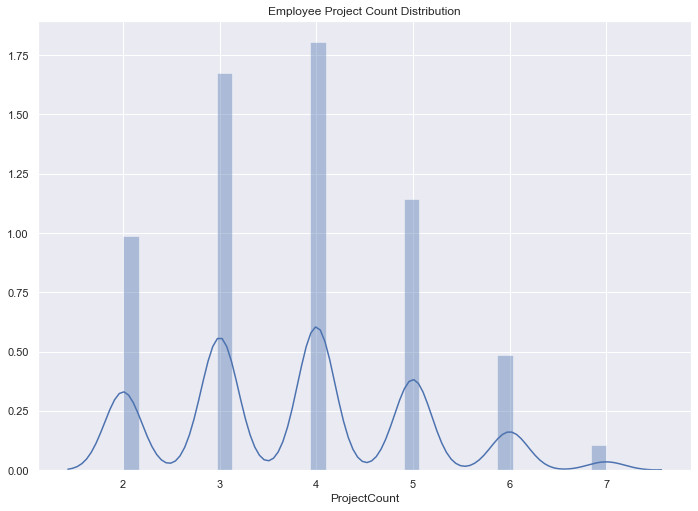

In [82]:
sns.distplot(df.ProjectCount).set_title('Employee Project Count Distribution')
sns.set(rc={'figure.figsize':(11.7,8.27)})

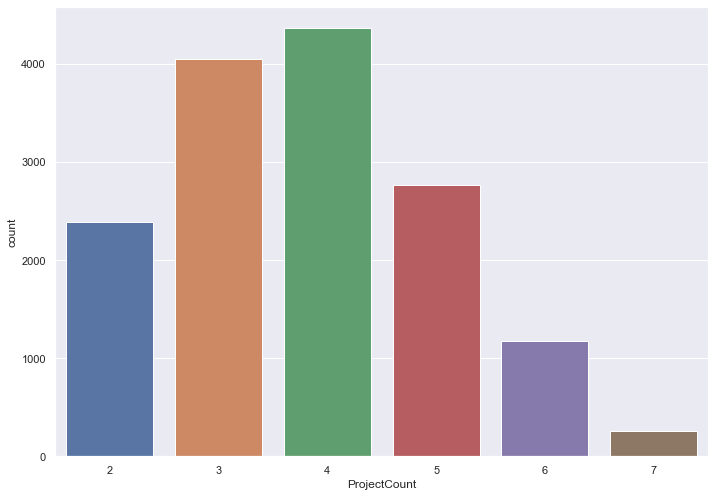

In [83]:
sns.countplot(df.ProjectCount)
sns.set(rc={'figure.figsize':(11.7,8.27)})
#people with 2 projects have high chances of turnover 
#people with 6 and 7 projects have higher chances of turnover 
#people between 3 to 5 projects have less chances of turnover 

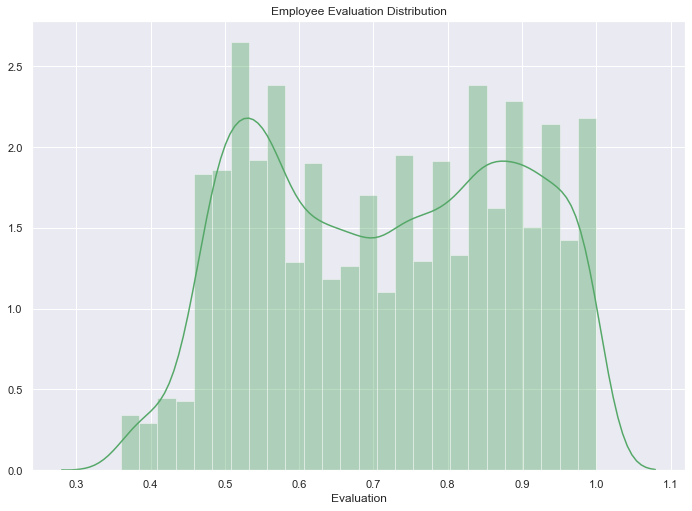

In [84]:
sns.distplot(df.Evaluation,color='g').set_title('Employee Evaluation Distribution')
sns.set(rc={'figure.figsize':(11.7,8.27)})

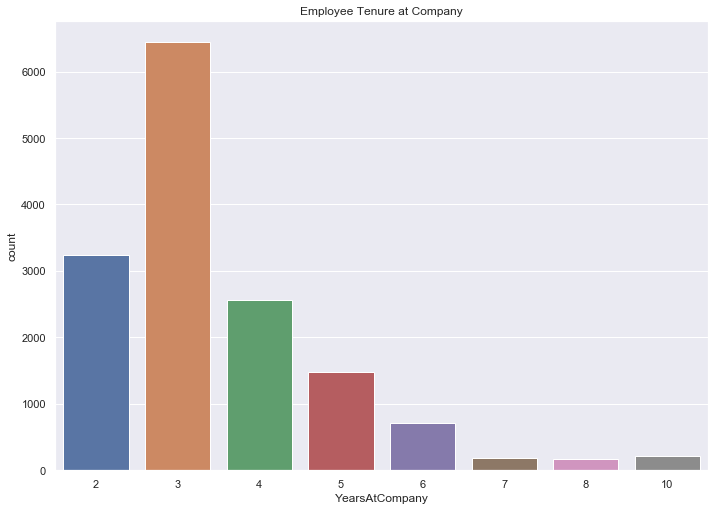

In [85]:
sns.countplot(df.YearsAtCompany).set_title('Employee Tenure at Company')
sns.set(rc={'figure.figsize':(11.7,8.27)})

#employee with 5 year of exp are higher chances of turnover 
#employee with 7 to 10 years of exp are lesser chances of turnover 

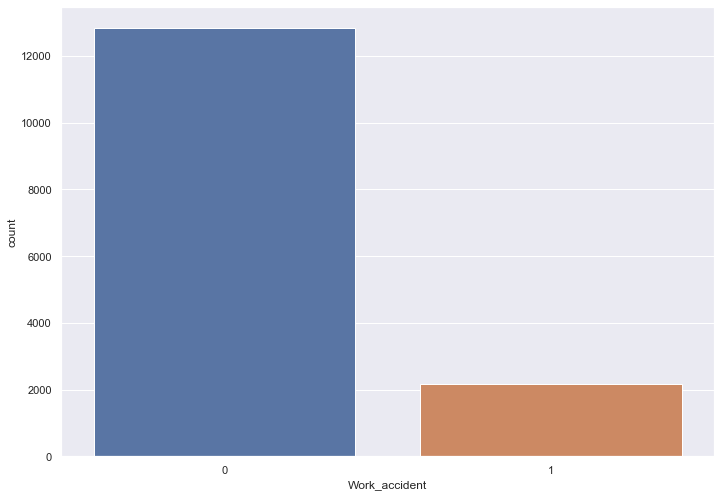

In [86]:
sns.countplot(df.Work_accident)
sns.set(rc={'figure.figsize':(11.7,8.27)})

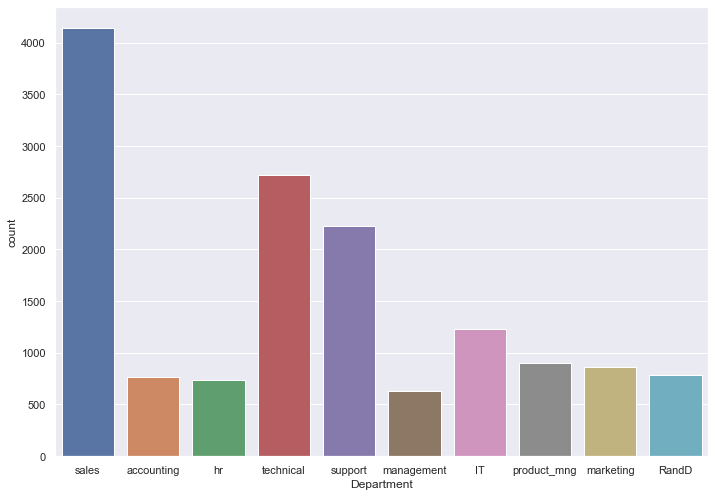

In [87]:
sns.countplot(df.Department)
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Top 3 departments where employee turnover 
#sales
#Technical
#Support

#Summary:
1. Average Monthly Hours:  Bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
2. Satisfcation: There is a huge spike for employees with low satisfaction and high satisfaction. 
3. Evaluation: Bimodal distribution of employees for employees with low evaluations(less than 0.6) and high evaluations(more than 0.8)
4. The highest number of employees in the compnay are from 'Sales' department.
5. The count of employees with tenure of 3 years is higher.
6. The count of employees who faced a work accident is very low.

## Salary vs Turnover

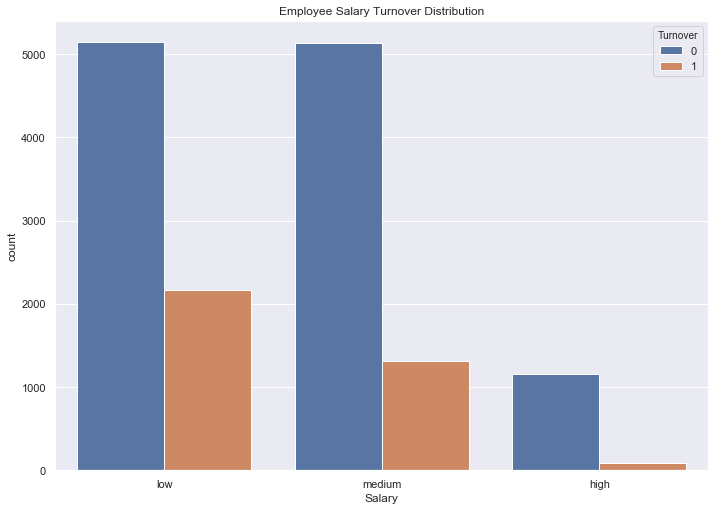

In [88]:
sns.countplot(df.Salary, hue=df.Turnover).set_title('Employee Salary Turnover Distribution');
sns.set(rc={'figure.figsize':(11.7,8.27)})

Summary: Employees with low and medium salaries are more likely to leave the company. It is observed that the employees with high salaries are least likely to leave the company

## Project Count vs Turnover

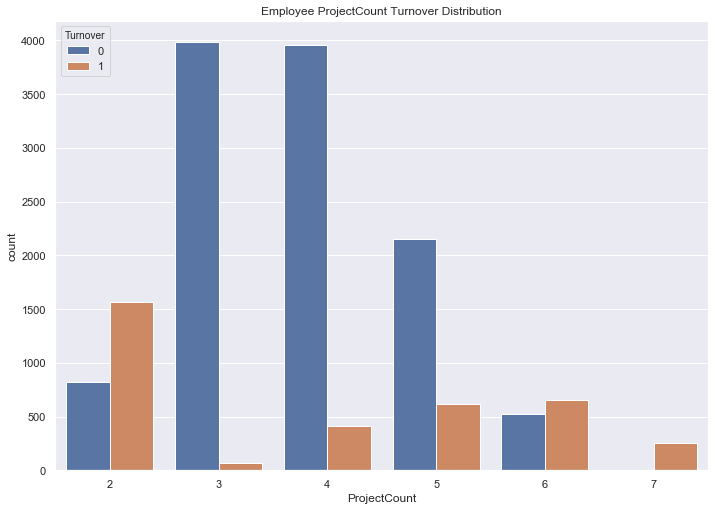

In [89]:
sns.countplot(df.ProjectCount, hue=df.Turnover).set_title('Employee ProjectCount Turnover Distribution')
sns.set(rc={'figure.figsize':(11.7,8.27)})

Summary: The employee turonver is high for employees with 2,6 and 7 projects. 
Majority of the employees with 3,4,5 projects did not leave the company.
All the employees with 7 projects left the company.

## Evaluation vs Turnover

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

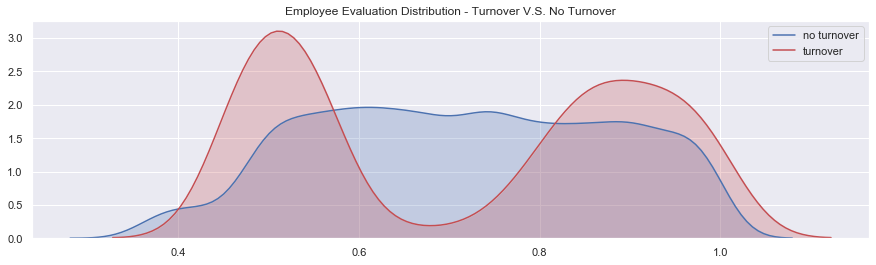

In [90]:
fig = plt.figure(figsize=(15,4),)
sns.kdeplot(df.loc[(df['Turnover'] == 0),'Evaluation'] , color='b',shade=True,label='no turnover')
sns.kdeplot(df.loc[(df['Turnover'] == 1),'Evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Summary: Employees with low and high performance tend to leave the company more. The sweet spot for employees that stayed is within 0.6-0.8 evaluation.

## AvMonthlyHours vs Turnover

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

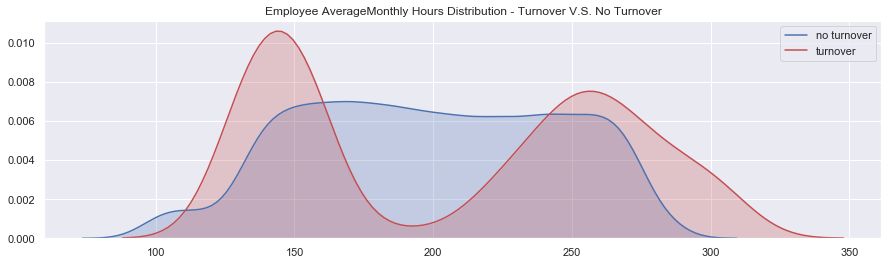

In [91]:
fig = plt.figure(figsize=(15,4))
sns.kdeplot(df.loc[(df['Turnover'] == 0),'AvgMonthlyHours'] , color='b',shade=True, label='no turnover')
sns.kdeplot(df.loc[(df['Turnover'] == 1),'AvgMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

Summary: Employees who had less hours of work (150hours or less) left the company more
Employees who had too many hours of work (250 or more) left the company
Employees who left generally were underworked or overworked.

## Satisfaction vs Turnover

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

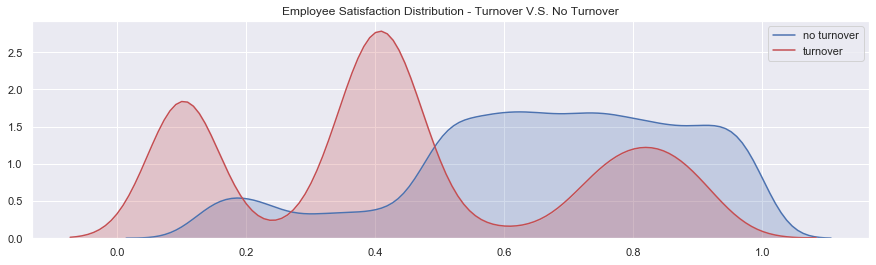

In [92]:
fig = plt.figure(figsize=(15,4))
sns.kdeplot(df.loc[(df['Turnover'] == 0),'Satisfaction'] , color='b',shade=True, label='no turnover')
sns.kdeplot(df.loc[(df['Turnover'] == 1),'Satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

Summary: Employees who had really low satisfaction levels (0.2 or less) left the company more
Employees who had low satisfaction levels (0.3~0.5) left the company more
Employees who had really high satisfaction levels (0.7 or more) left the company more

## Turnover vs YearsAtCompany

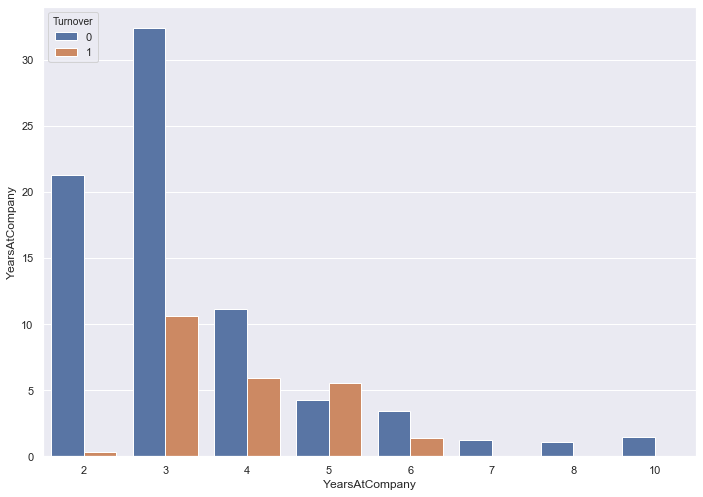

In [94]:
sns.barplot(x="YearsAtCompany", y="YearsAtCompany", hue="Turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
#ax.set(ylabel="Percent")
sns.set(rc={'figure.figsize':(11.7,8.27)})

Summary: More than half of the employees with 4 and 5 years left the company.

## Workaccident vs Turnover

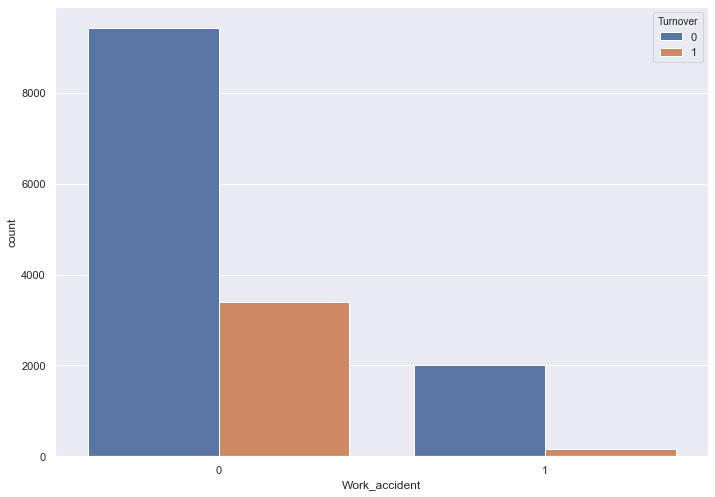

In [95]:
sns.countplot(df.Work_accident, hue=df.Turnover)
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Promotion Vs Turnover

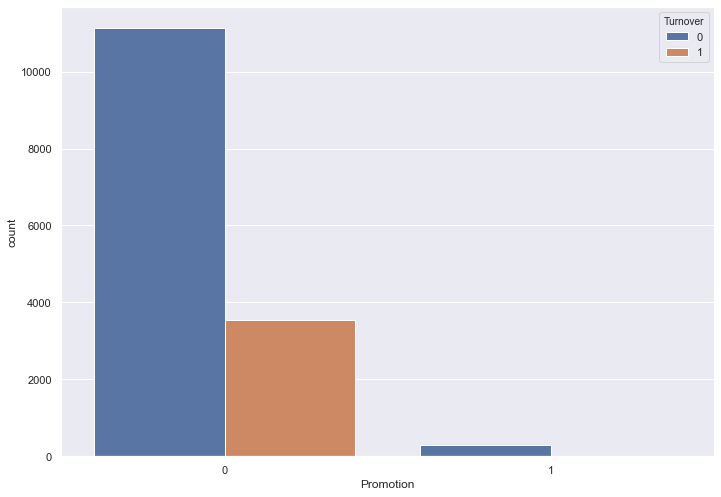

In [96]:
sns.countplot(df.Promotion, hue=df.Turnover)
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Department vs Turnover

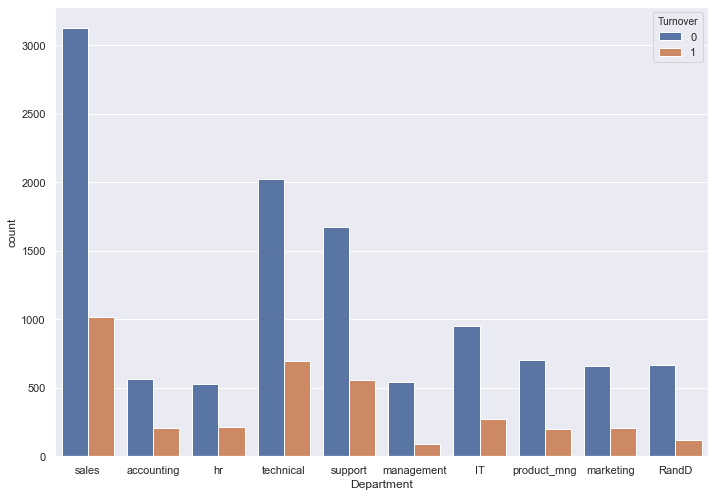

In [97]:
sns.countplot(df.Department, hue=df.Turnover)
sns.set(rc={'figure.figsize':(11.7,8.27)})

## ProjectCount vs Evaluation 

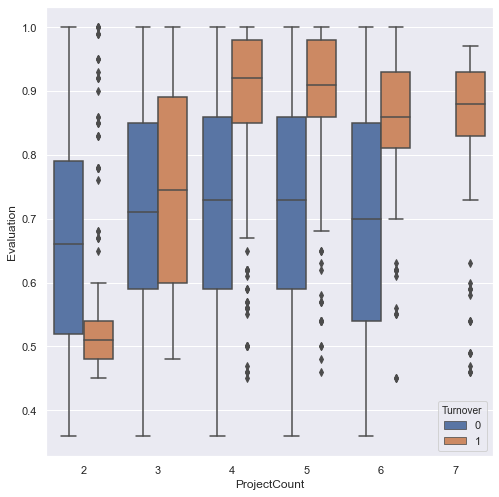

In [205]:
sns.boxplot(x="ProjectCount", y="Evaluation", hue="Turnover", data=df)
sns.set(rc={'figure.figsize':(8,8.27)})

Summary: Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts.

## Satisfaction vs Evaluation

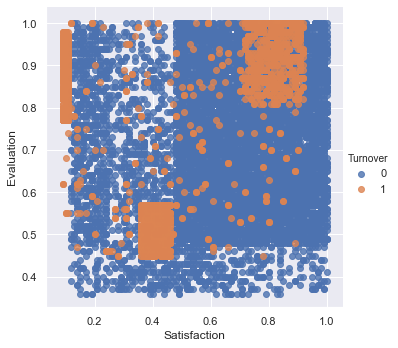

In [99]:
sns.lmplot(x='Satisfaction', y='Evaluation', data=df,
           fit_reg=False, # No regression line
           hue='Turnover')

Summary: There are 3 distinct clusters for employees who left the company
Cluster 1: (Hard-working and Sad Employee)
Satisfaction was below 0.2 and evaluations were greater than 0.75 which could be a good indication that employees who left the company were good workers but felt horrible at their job.

Cluster 2:(Bad and Sad Employee)
Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

Cluster 3: (Hard-working and Happy Employee)
Satisfaction between 0.7~1.0 and evaluations were greater than 0.8 which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

## ProjectCount vs AvgMonthlyHours

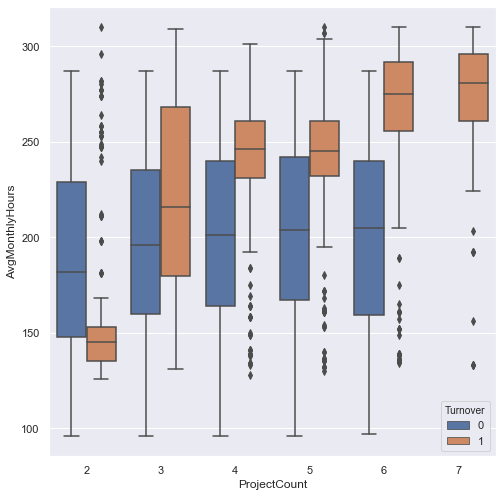

In [100]:
sns.boxplot(x="ProjectCount", y="AvgMonthlyHours", hue="Turnover", data=df)

Summary: Looks like the average employees who stayed worked about 200hours/month. 
Those that had a turnover worked about 250hours/month or 150hours/month

## K-Means clustering of Employee Turnover

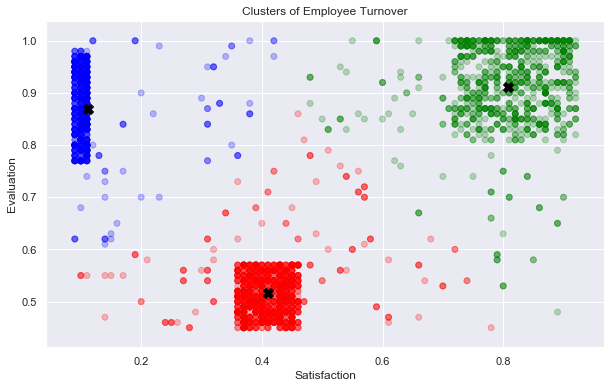

In [109]:
from sklearn.cluster import KMeans

#graph and create 3 cluster of employee turnover 

kmeans = KMeans(n_clusters=3, random_state=2) 
kmeans.fit(df[df.Turnover==1][["Satisfaction","Evaluation"]]) 

kmeans_colors = [ "green" if c==0 else "Blue" if c==2 else "red" for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Satisfaction",y="Evaluation", data=df[df.Turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

C:\Users\SAAD KHAN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SAAD KHAN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


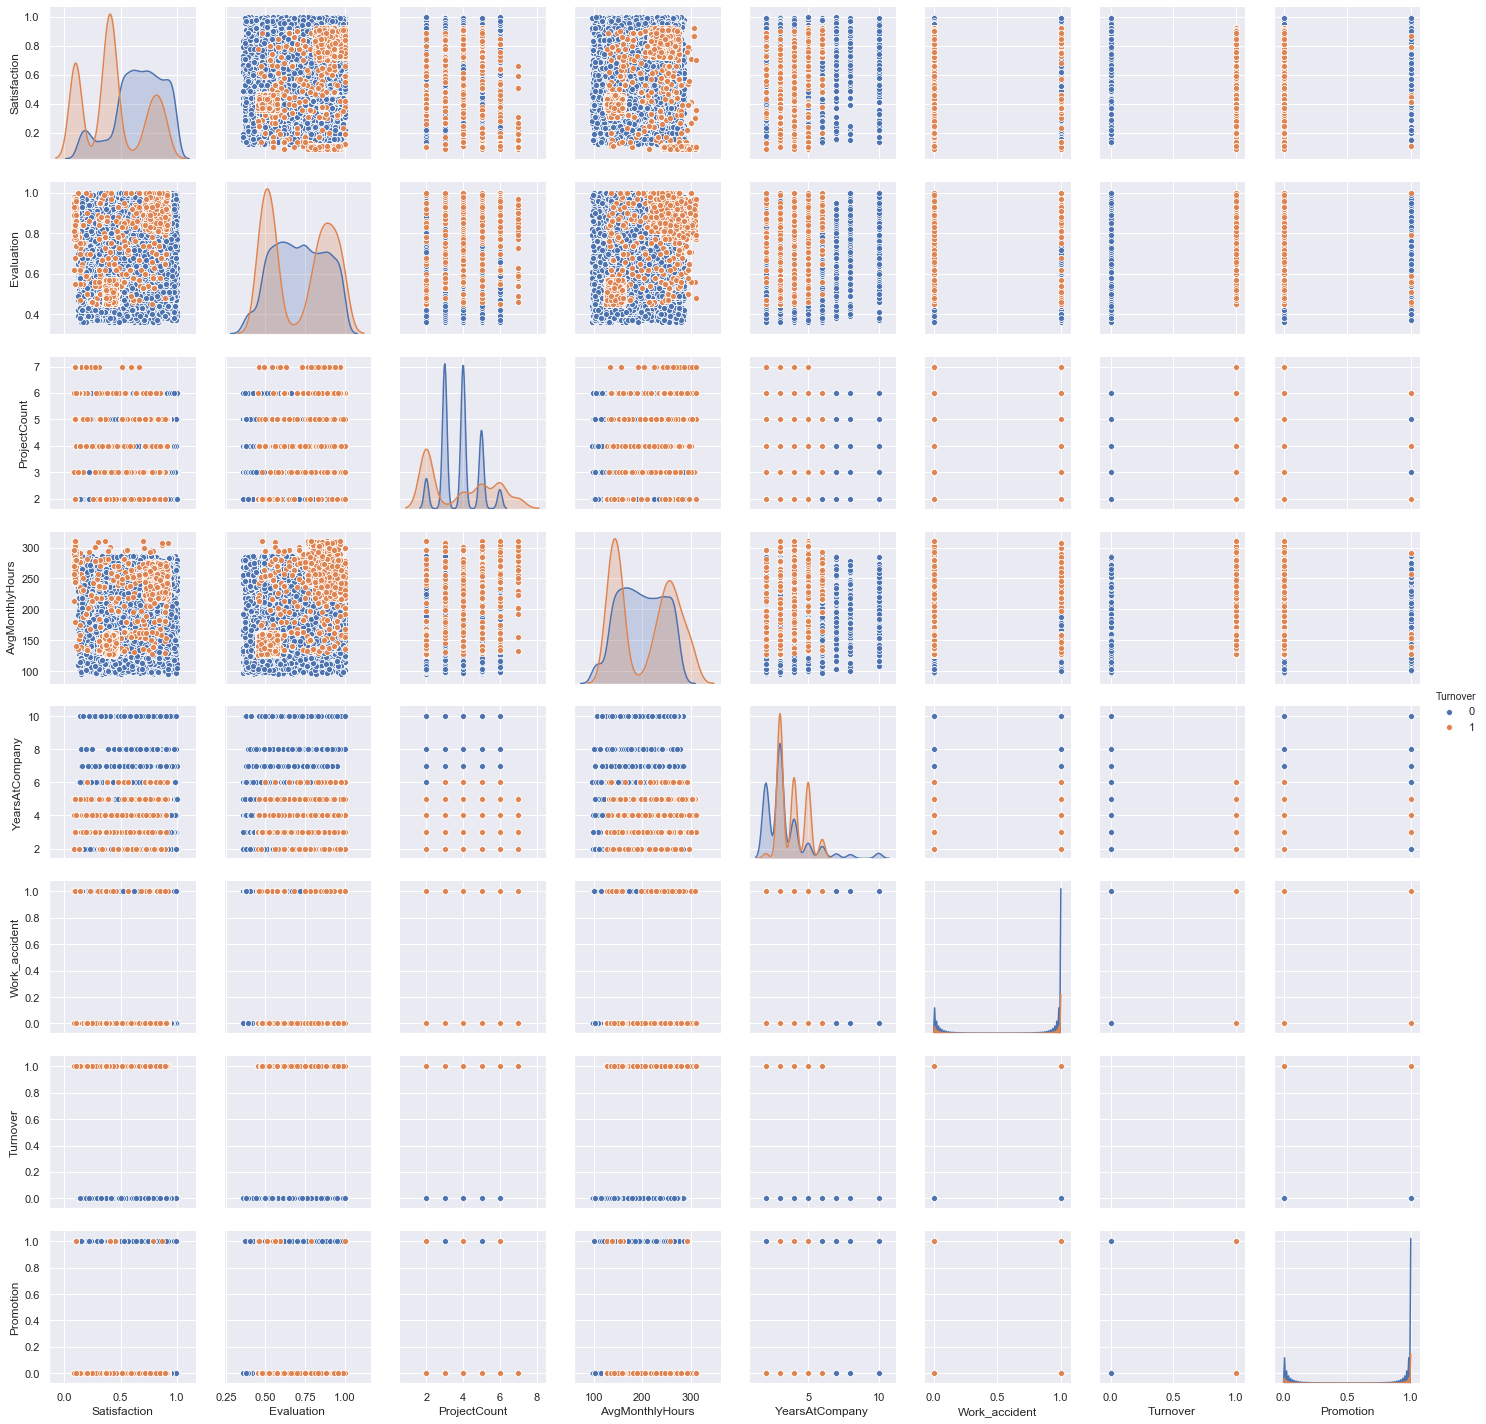

In [102]:
sns.pairplot(df, diag_kind='kde',hue="Turnover") 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
Satisfaction       14999 non-null float64
Evaluation         14999 non-null float64
ProjectCount       14999 non-null int64
AvgMonthlyHours    14999 non-null int64
YearsAtCompany     14999 non-null int64
Work_accident      14999 non-null int64
Turnover           14999 non-null int64
Promotion          14999 non-null int64
Department         14999 non-null object
Salary             14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [104]:
#created the dummies to the categorical variable 
dummydata = pd.get_dummies(df)

In [105]:
dummydata.shape

(14999, 21)

In [ ]:
#Now split the data into train and test and start applying Ml model 
#drop the target variable into "Y" 

## 4. Model the data


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef, classification_report, roc_auc_score, roc_curve, confusion_matrix 
from sklearn.preprocessing import RobustScaler

In [ ]:
x=dummydata.drop("Turnover",axis=1)
y=dummydata.Turnover

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 123)

In [111]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

In [112]:
scaled_train =pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
scaled_test =pd.DataFrame(sc.transform(x_test), columns = x_test.columns)

In [153]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
pred_lr = lr.fit(scaled_train, y_train).predict(scaled_test)
probs1 = lr.predict_proba(scaled_test)
probability1 = probs1[:,1] 
auc1 = roc_auc_score(y_test,probability1)

C:\Users\SAAD KHAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [184]:
print("Train accuracy of the model :", lr.score(x_train, y_train))
print("Test accuracy of the model :", lr.score(x_test, y_test)) 
print("Model accuracy : ",accuracy_score(y_test, pred_lr))
print("Kappa score :", cohen_kappa_score(y_test,pred_lr))
#print("ROC & AUC : ", roc_auc_score(y_test, lr.predict(scaled_test)))
print("AUC Score:", auc1)
print()
print(classification_report(y_test,pred_lr)) 

Train accuracy of the model : 0.23811791599199925
Test accuracy of the model : 0.238
Model accuracy :  0.7897777777777778
Kappa score : 0.3137906321540591
AUC Score: 0.8196192251567682

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3429
           1       0.61      0.33      0.43      1071

    accuracy                           0.79      4500
   macro avg       0.71      0.63      0.65      4500
weighted avg       0.77      0.79      0.77      4500



In [185]:
#Preparing data for roc curve 
#fpr, tpr, threshold = roc_curve(y_test,probability1) 
#def drawcurve1(fpr,tpr):
    #plt.plot(fpr,tpr,color="blue", label="ROC")
    #plt.plot([0,1],[0,1],color="red", linestyle="--")
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    #plt.title("ROC Curve")
    #plt.legend()
    #plt.show() 

In [186]:
#drawcurve1(fpr,tpr)
#plt.show()

In [187]:
### Decission Tree Classifier 
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier(max_depth=3, min_weight_fraction_leaf=0.01) 
pred_tree = dtree.fit(scaled_train, y_train).predict(scaled_test)
probs2 = dtree.predict_proba(scaled_test)
probability2 = probs2[:,1] 
auc2 = roc_auc_score(y_test,probability2)

In [188]:
print("Train accuracy of the model :", dtree.score(x_train, y_train))
print("Test accuracy of the model :", dtree.score(x_test, y_test)) 
print("Model accuracy : ",accuracy_score(y_test, pred_tree))
print("Kappa score :", cohen_kappa_score(y_test,pred_tree))
#print("ROC & AUC : ", roc_auc_score(y_test, dtree.predict(scaled_test)))
print("AUC Score: ", auc2)
print()
print(classification_report(y_test,pred_tree))
print(confusion_matrix(y_test,pred_tree))

Train accuracy of the model : 0.32726926373940374
Test accuracy of the model : 0.3151111111111111
Model accuracy :  0.9448888888888889
Kappa score : 0.8493159674036412
AUC Score:  0.964336429623857

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3429
           1       0.88      0.90      0.89      1071

    accuracy                           0.94      4500
   macro avg       0.92      0.93      0.92      4500
weighted avg       0.95      0.94      0.95      4500

[[3292  137]
 [ 111  960]]


In [189]:
#Preparing data for roc curve 
#fpr, tpr, threshold = roc_curve(y_test,probability2) 
#def drawcurve(fpr,tpr):
    #plt.plot(fpr,tpr,color="blue", label="ROC")
    #plt.plot([0,1],[0,1],color="red", linestyle="--")
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    #plt.title("ROC Curve")
    #plt.legend()
    #plt.show()    

In [190]:
#drawcurve(fpr,tpr)
#plt.show()

In [191]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
pred_rf = rf.fit(scaled_train, y_train).predict(scaled_test)
probs3 = rf.predict_proba(scaled_test)
probability3 = probs3[:,1] 
auc3 = roc_auc_score(y_test,probability3)

C:\Users\SAAD KHAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [192]:
print("Train accuracy:",rf.score(x_train,y_train))
print("Test accuracy : ", rf.score(x_test,y_test)) 
print("Accuracy :",accuracy_score(y_test,pred_rf)) 
print("Kappa :",cohen_kappa_score(y_test,pred_rf)) 
print("AUC Score:",auc3)
print()
print(classification_report(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))

Train accuracy: 0.6568244594723307
Test accuracy :  0.6593333333333333
Accuracy : 0.9888888888888889
Kappa : 0.9691287135070522
AUC Score: 0.9892940942295068

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

[[3416   13]
 [  37 1034]]


In [193]:
#fpr, tpr, threshold = roc_curve(y_test,probability3) 
#def drawcurve3(fpr,tpr):
    #plt.plot(fpr,tpr,color="blue", label="ROC")
    #plt.plot([0,1],[0,1],color="red", linestyle="--")
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    #plt.title("ROC Curve")
    #plt.legend()
    #plt.show()  

In [194]:
#drawcurve3(fpr,tpr)
#plt.show()

In [195]:
## Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier 
ada = AdaBoostClassifier()
pred_ada = ada.fit(scaled_train, y_train).predict(scaled_test)
probs4 = ada.predict_proba(scaled_test)
probability4 = probs4[:,1] 
auc4 = roc_auc_score(y_test, probability4) 

In [196]:
print("Train accuracy:",ada.score(x_train,y_train))
print("Test accuracy : ", ada.score(x_test,y_test)) 
print("Accuracy :",accuracy_score(y_test,pred_ada)) 
print("Kappa :",cohen_kappa_score(y_test,pred_ada)) 
print("AUC Score:",auc4)
print()
print(classification_report(y_test,pred_ada))
print(confusion_matrix(y_test,pred_ada))

Train accuracy: 0.17392132584055625
Test accuracy :  0.17533333333333334
Accuracy : 0.956
Kappa : 0.8783792748456399
AUC Score: 0.9813033991666076

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3429
           1       0.91      0.90      0.91      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500

[[3334   95]
 [ 103  968]]


In [197]:
#fpr, tpr, threshold = roc_curve(y_test,probability4)
#def drawcurve4(fpr,tpr):
    #plt.plot(fpr,tpr,color="blue", label="ROC")
    #plt.plot([0,1],[0,1],color="red", linestyle="--")
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    #plt.title("ROC Curve")
    #plt.legend()
    #plt.show()

In [198]:
#drawcurve4(fpr,tpr)
#plt.show()

In [199]:
print("------------------ Accuracy Comparison -------------------")
print("Logistic regression : ",accuracy_score(y_test, pred_lr))
print("Decission Tree : ",accuracy_score(y_test, pred_tree))
print("Random Forest :",accuracy_score(y_test,pred_rf))
print("AdaBoost :",accuracy_score(y_test,pred_ada))

------------------ Accuracy Comparison -------------------
Logistic regression :  0.7897777777777778
Decission Tree :  0.9448888888888889
Random Forest : 0.9888888888888889
AdaBoost : 0.956


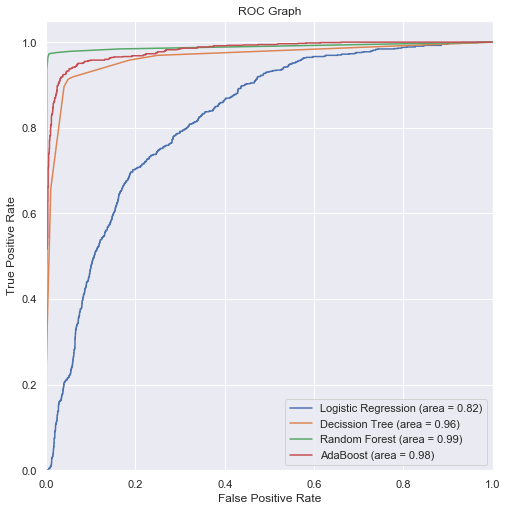

In [200]:
#ROC Curve 
from sklearn.metrics import roc_curve

fpr_1, tpr_1, threshold_1 = roc_curve(y_test,probability1)
fpr_2, tpr_2, threshold_2 = roc_curve(y_test,probability2)
fpr_3, tpr_3, threshold_3 = roc_curve(y_test,probability3)
fpr_4, tpr_4, threshold_4 = roc_curve(y_test,probability4) 

plt.figure() 
 
plt.plot(fpr_1, tpr_1, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, probability1))
plt.plot(fpr_2, tpr_2, label='Decission Tree (area = %0.2f)' % roc_auc_score(y_test, probability2))
plt.plot(fpr_3, tpr_3, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, probability3))
plt.plot(fpr_4, tpr_4, label='AdaBoost (area = %0.2f)' % roc_auc_score(y_test, probability4))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show() 

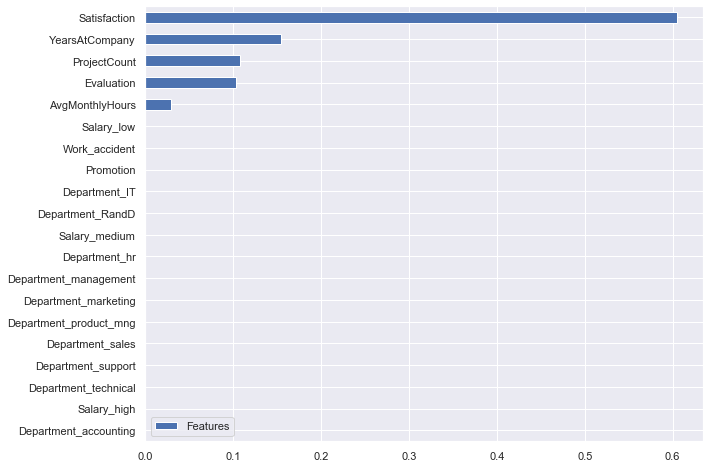

In [204]:
#Features Importance- Decission Tree 
pd.DataFrame(dtree.feature_importances_, index=x_train.columns,
            columns=["Features"]).sort_values(by="Features").plot(kind="barh",figsize=[10,8])
plt.show()

## Interpretation of the Data 

Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.

1. Employees with low to medium salaries are more likely to leave the company. It is observed that the employees with high salaries are least likely to leave the company.

2. The employee turnover is high in the departments Sales, techincal, Support. The Management departmnet has the least employee turnover.

3. The employee turonver is high for employees with 2,6 and 7 projects. Majority of the employees with 3,4,5 projects did not leave the company. All the employees with 7 projects left the company.

4. Employees with low and high performance tend to leave the company more. The sweet spot for employees that stayed is within 0.6-0.8 evaluation.

5. Employees who had less hours of work (150hours or less) left the company more. Employees who had too many hours of work (250 or more) left the company Employees who left generally were underworked or overworked.

6. Employees who had really low satisfaction levels (0.2 or less) left the company more Employees who had low satisfaction levels (0.3~0.5) left the company more Employees who had really high satisfaction levels (0.7 or more) left the company more.

7.  More than half of the employees with 4 and 5 years left the company.

8. Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts. There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left. 

